<a href="https://colab.research.google.com/github/Meet200/Machine_Learning-/blob/main/viral_pneumonia_prediction_using_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
%matplotlib inline

Adding Train and Test Data

In [ ]:
normal_train='../input/chest-xray-pneumonia/chest_xray/train/NORMAL'
j_n=os.listdir(normal_train)
pneumonia_train='../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA'
j_p=os.listdir(pneumonia_train)


train='../input/chest-xray-pneumonia/chest_xray/train'
test='../input/chest-xray-pneumonia/chest_xray/test'
val='../input/chest-xray-pneumonia/chest_xray/val'

**Visulizing images**

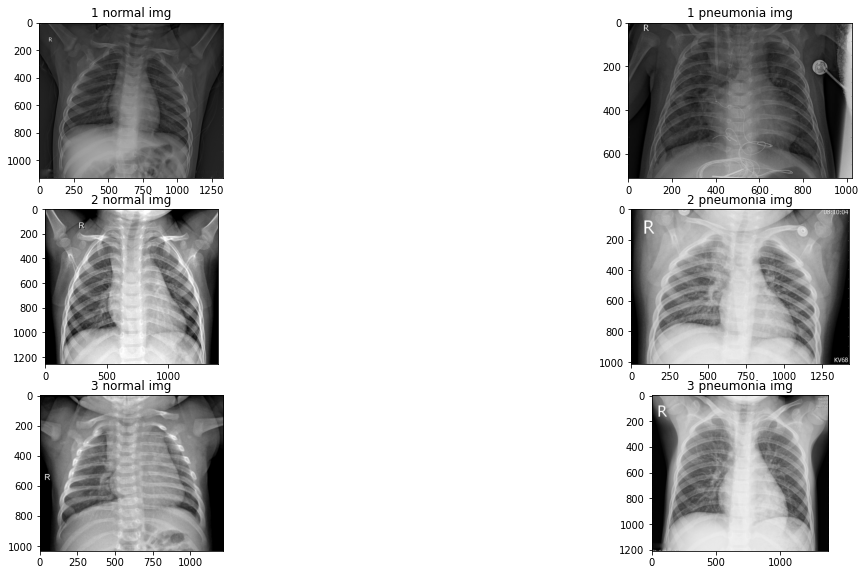

In [ ]:
fig=plt.figure(figsize=(20,20))
o=1
for i in range(3):
    fig.add_subplot(6,2,o)
    plt.title(str(i+1)+' normal img')
    j=cv2.imread(os.path.join(normal_train,j_n[i]))
    plt.imshow(j)
    o+=1
    fig.add_subplot(6,2,o)
    plt.title(str(i+1)+' pneumonia img')
    j=cv2.imread(os.path.join(pneumonia_train,j_p[i]))
    plt.imshow(j)
    o+=1
plt.show()

In [ ]:
print('total training normal images :', len(os.listdir(normal_train) ))
print('total training pneumonia images :', len(os.listdir(pneumonia_train ) ))


print('total training normal images :', len(os.listdir(train)))
print('total validation normal images :', len(os.listdir(val) ))
print('total testing normal images :', len(os.listdir(test)))



total training normal images : 1341
total training pneumonia images : 3875
total training normal images : 2
total validation normal images : 2
total testing normal images : 2


Visulizing number of train and test data

Text(0, 0.5, 'no. of images')

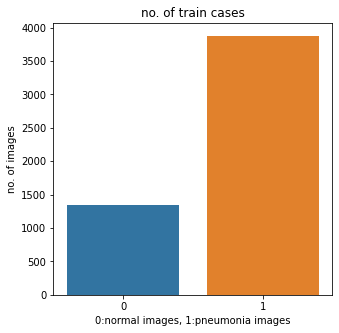

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x=[0,1], y= [len(j_n),len(j_p)])
plt.title('no. of train cases')
plt.xlabel('0:normal images, 1:pneumonia images')
plt.ylabel('no. of images')

Data Augmentation => here as we can asee we have less number of training data compare to test so first we need to augment our data 

#1.Flow of Augmentation is, 
#2.Scaling
#3.Translation
#4.Rotation (at 90 degrees)
#5.Rotation (at finer angles)
#6.Flipping
#7.Adding some noise
#8.Lighting condition
#9.Perspective transform







In [ ]:
gen=ImageDataGenerator(rotation_range=20,width_shift_range=0.1,
                       height_shift_range=0.1,shear_range=0.15,
                       zoom_range=0.1,channel_shift_range=10,horizontal_flip=True,vertical_flip=True,
                       fill_mode='constant',cval=125)



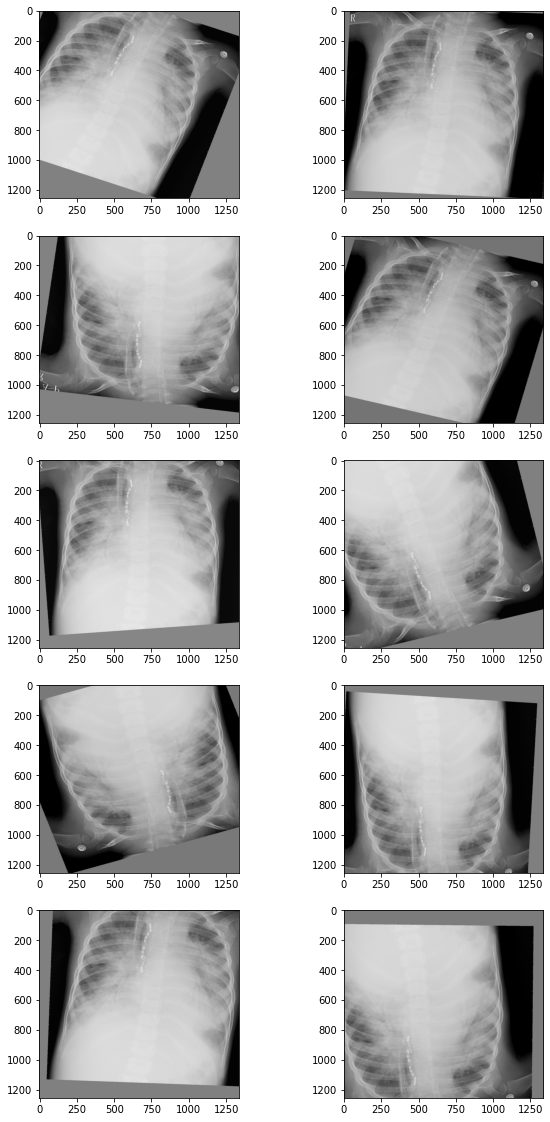

In [ ]:
#below function plots the  
def plots(figsize,images,a,b):
    fig=plt.figure(figsize=figsize)
    for i in range(1,len(images)+1):
        fig.add_subplot(a,b,i)
        plt.imshow(images[i-1])
    plt.show()
               
        
def create_images(path,j_p,i,pri):
    img_path=os.path.join(path,j_p[i])
    image=np.expand_dims(cv2.imread(img_path),0)
    aug_itter=gen.flow(image)#,save_to_dir=path,save_prefix='aug',save_format='jpeg')
    aug_images=[next(aug_itter)[0].astype(np.uint8) for i in range(10)]
    if pri=='print':
        plots((10,20),aug_images,5,2)


#takes-> path of directory, 
#        images_name_list, 
#        which image(i'th image),
#       'print' if want to print images else empty with ""    
create_images(pneumonia_train,j_p,3,'print')

Load Train,Test,validation data

In [ ]:
train_gen=ImageDataGenerator(rescale=1./255)
train=train_gen.flow_from_directory(train_,
                                   target_size=(250,250),
                                   batch_size=10,
                                   class_mode='binary')


#loads augmented load_data
augmentation=ImageDataGenerator(rescale=1./255,rotation_range=20,width_shift_range=0.1,
                       height_shift_range=0.1,shear_range=0.15,
                       zoom_range=0.1,channel_shift_range=10,horizontal_flip=True,vertical_flip=True,
                       fill_mode='constant',cval=125)
train_augmentation=augmentation.flow_from_directory(train_,
                                target_size=(250,250),
                                batch_size=10,
                                class_mode='binary')


#loads test data
test_gen=ImageDataGenerator(rescale=1./255)
test=test_gen.flow_from_directory(test_,
                                  target_size=(250,250),
                                  batch_size=10,
                                  class_mode='binary')


#loads validaiton data
val_gen=ImageDataGenerator(rescale=1./255)
val=val_gen.flow_from_directory(test_,
                                target_size=(250,250),
                                batch_size=10,
                                class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(250,250,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(1024,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32,activation='sigmoid'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 248, 248, 64)      1792      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 124, 124, 64)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 62, 62, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 31, 31, 256)      

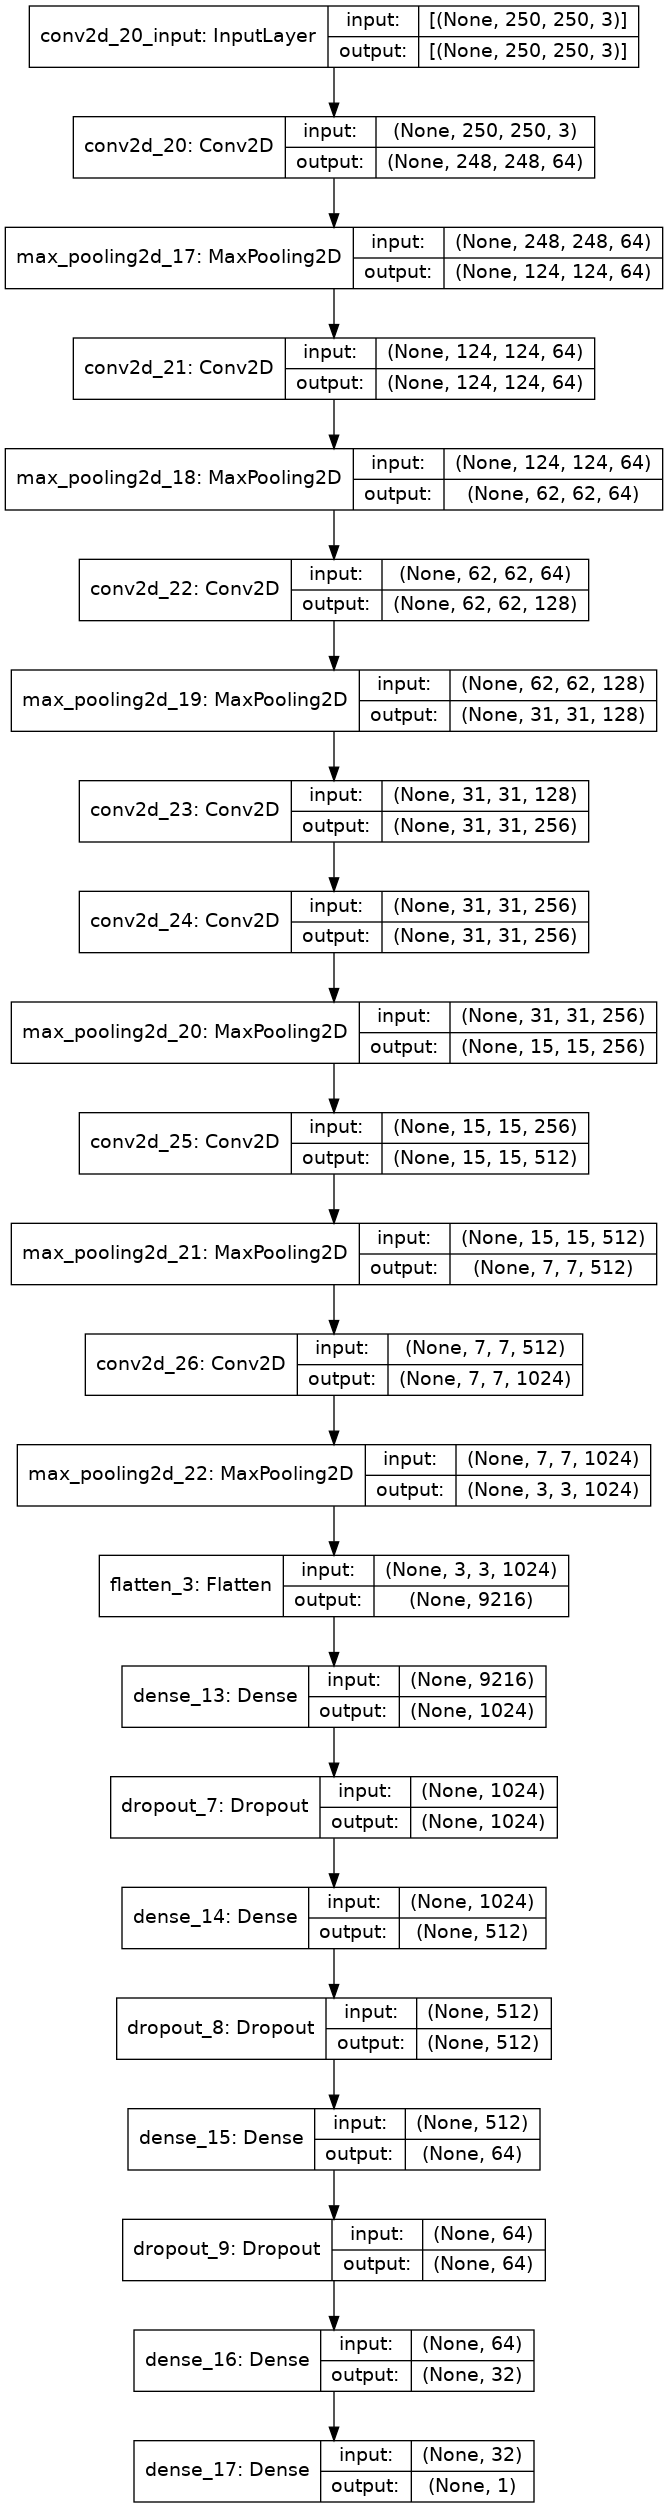

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
from keras.optimizers import Adam
opt=Adam(lr=0.0001)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['acc'])

#this function plots the graph between train and validation data parameters
def plot_metrics(history,epochs):
    epoch=range(1,epochs+1)
    loss=history.history['loss']
    accuracy=history.history['acc']
    vlos=history.history['val_loss']
    vacc=history.history['val_acc']
    plt.title('Loss graph')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(epoch,loss)
    plt.plot(epoch,vlos)
    plt.show()
    plt.title('Accuracy graph')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(epoch,accuracy)
    plt.plot(epoch,vacc)
    plt.show()

In [ ]:
epochs=15
history=model.fit_generator(train_augmentation,
                            steps_per_epoch=20,
                            epochs=epochs,
                            validation_data=val,
                            validation_steps=8,
                            verbose=1)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
20/20 [==============================] - 46s 2s/step - loss: 0.7377 - acc: 0.4332 - val_loss: 0.8518 - val_acc: 0.5750
Epoch 2/15
20/20 [==============================] - 44s 2s/step - loss: 0.6407 - acc: 0.6887 - val_loss: 0.6940 - val_acc: 0.6000
Epoch 3/15
20/20 [==============================] - 44s 2s/step - loss: 0.6238 - acc: 0.7212 - val_loss: 0.7291 - val_acc: 0.6000
Epoch 4/15
20/20 [==============================] - 45s 2s/step - loss: 0.6037 - acc: 0.7151 - val_loss: 0.7799 - val_acc: 0.5500
Epoch 5/15
20/20 [==============================] - 44s 2s/step - loss: 0.5908 - acc: 0.7284 - val_loss: 0.6183 - val_acc: 0.6875
Epoch 6/15
20/20 [==============================] - 44s 2s/step - loss: 0.5466 - acc: 0.7700 - val_loss: 0.6959 - val_acc: 0.6125
Epoch 7/15
20/20 [==============================] - 44s 2s/step - loss: 0.5819 - acc: 0.7406 - val_loss: 0.6579 - val_acc: 0.6625
Epoch 8/15
20/20 [==============================] - 44s 2s/step - loss: 0.5530 - acc: 0.76

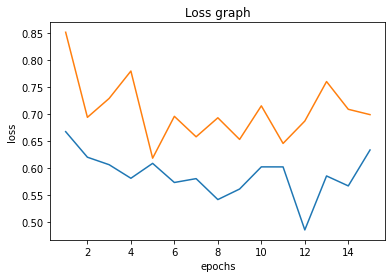

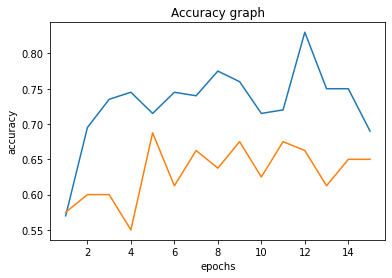

In [ ]:
plot_metrics(history,epochs)

In [ ]:
loss, acc = model.evaluate_generator(test, steps=3, verbose=1)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


3/3 [==============================] - 2s 533ms/step - loss: 0.8074 - acc: 0.5667


In [ ]:
model.save('my_model.h5')